In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import pickle

In [2]:
df = pd.read_csv('data/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [172]:
df[df['Present_Price'] == 9.9]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
251,city,2013,5.00,9.9,56701,Petrol,Dealer,Manual,0
253,city,2014,7.20,9.9,48000,Diesel,Dealer,Manual,0
254,city,2013,5.25,9.9,54242,Petrol,Dealer,Manual,0
293,city,2010,3.25,9.9,38000,Petrol,Dealer,Manual,0


In [28]:
for col in df.columns:
    if len(df[col].unique()) < 10:
        print(f'{col} : {df[col].unique()}')

Fuel_Type : ['Petrol' 'Diesel' 'CNG']
Seller_Type : ['Dealer' 'Individual']
Transmission : ['Manual' 'Automatic']
Owner : [0 1 3]


In [119]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [29]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [31]:
data = df.iloc[:,1:]
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [34]:
data['years_used'] = df['Year'].map(lambda x:2022-x)
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years_used
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [36]:
data.drop(['Year'], axis = 1, inplace = True)
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years_used
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [41]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,years_used,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


<AxesSubplot:>

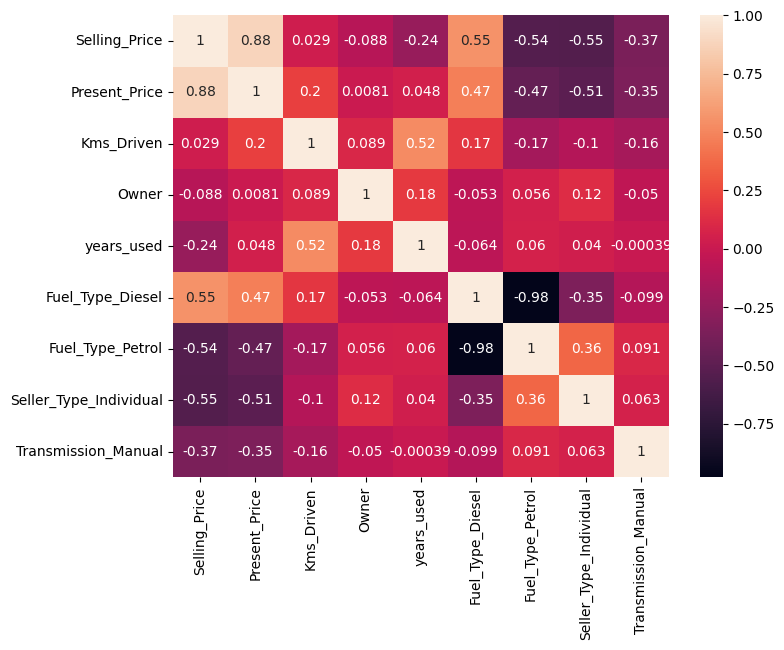

In [57]:
corr = data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True)

In [58]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,years_used,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [159]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [160]:
# Feature Iportance
model = ExtraTreesRegressor().fit(X,y)
print(model.feature_importances_)

[0.37208531 0.03911221 0.0004041  0.07648185 0.23162204 0.01074232
 0.12753514 0.14201702]


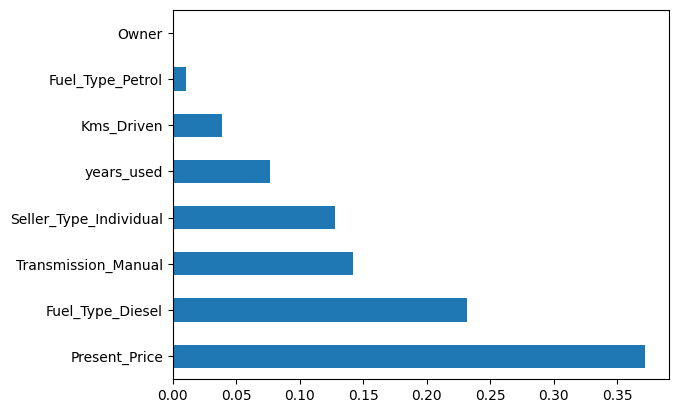

In [161]:
feature_imp = pd.Series(model.feature_importances_, index=X.columns)
feature_imp.nlargest(8).plot(kind='barh')
plt.show()

In [162]:
y = np.log1p(y)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [163]:
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [164]:
rf = RandomForestRegressor()
# Hyperparameter Tuning
params = dict(n_estimators = [int(x) for x in np.linspace(100,1200,20)],
            max_features = ['auto','sqrt'],
            max_depth = [int(x) for x in np.linspace(5,30,10)],
            min_samples_split = [2, 5, 10, 15, 100],
            min_samples_leaf = [1, 2, 5, 10])

In [165]:
rfc_random = RandomizedSearchCV(estimator = rf, param_distributions = params, scoring='neg_mean_squared_error', n_iter=10, cv=5, random_state=42, n_jobs=1)

In [166]:
rfc_random.fit(Xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 7, 10, 13, 16, 18, 21,
                                                      24, 27, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 157, 215, 273,
                                                         331, 389, 447, 505,
                                                         563, 621, 678, 736,
                                                         794, 852, 910, 968,
                                                         1026, 1084, 1142,
                                                         1200]},
                   random_state=42, scorin

In [167]:
rfc_best = rfc_random.best_estimator_
rfc_best.fit(Xtrain, ytrain)
preds = rfc_best.predict(Xtest)

In [168]:
mean_squared_error(ytest, preds)

0.01801154287544289

<AxesSubplot:xlabel='Selling_Price', ylabel='Count'>

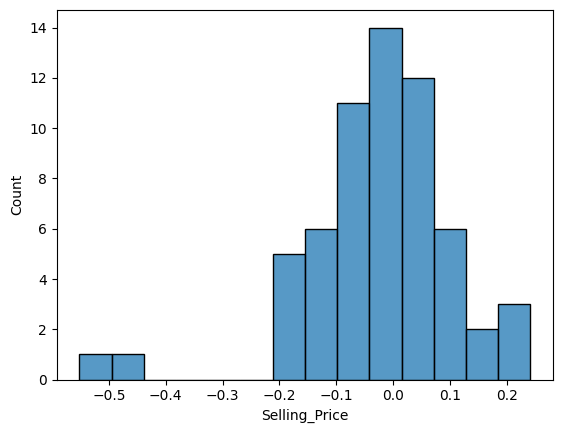

In [169]:
sns.histplot(ytest - preds)

In [171]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(rfc_random, open('car-price.pkl', 'wb'))